# **Egypt as a Case Study: Insights from the Global Terrorism Database (GTD)**
This notebook is part of a broader analytical project on global terrorism using the Global Terrorism Database (GTD).
While the main project explores worldwide patterns, this notebook focuses exclusively on Egypt, aiming to uncover national-level insights, trends, and patterns related to terrorist activities.

By narrowing the scope to Egypt, we aim to better understand the scale, nature, and evolution of terrorist incidents, as well as the impact on lives, property, and national security.

---

## Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style = "whitegrid", palette = "pastel")  
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Show all rows
pd.set_option("display.max_rows", None)

# Show all columns too
pd.set_option("display.max_columns", None)

## Reading the data 

In [3]:
data = pd.read_csv('Egypt_data.csv')

## Understanding the Data 

In [4]:
data.head(10)

,year,month,day,extended_event,country,region,province_state,city,vicinity_area,criteria_political,criteria_economic,criteria_religious,multiple_attacks,successful_attack,suicide_attack,primary_attack_type,primary_target_type,primary_target_subtype,target_nationality,secondary_target_type,group_name,individual_attack,attack_claimed,claim_mode,primary_weapon_type,secondary_weapon_type,secondary_weapon_subtype,num_killed,num_killed_us,num_killed_terrorists,num_wounded,num_wounded_us,num_wounded_terrorists,property_damage,property_extent_code,property_extent,property_value,hostage_incident,ransom_demanded,hostage_outcome_code,hostage_outcome,num_released,month_name
0,1970,3,14,0,Egypt,Middle East & North Africa,Alexandria,Alexandria,0,1,1,1,0.0,1,0,Bombing/Explosion,Airports & Aircraft,Aircraft (not at an airport),Egypt,Unknown,Unknown,0,0.0,Unknown,Explosives,Unknown,Unknown,0.0,0.0,0.0,2.0,0.0,0.0,1,4.0,Unknown,0.0,0.0,0.0,Unknown,Unknown,0.0,March
1,1971,11,28,0,Egypt,Middle East & North Africa,Cairo,Cairo,0,1,1,1,0.0,1,0,Assassination,Government (General),Head of State,Egypt,Unknown,Black September,0,0.0,Unknown,Firearms,Firearms,Handgun,1.0,0.0,0.0,0.0,0.0,0.0,0,Unknown,Unknown,0.0,0.0,0.0,Unknown,Unknown,0.0,November
2,1972,2,19,0,Egypt,Middle East & North Africa,Cairo,Cairo,0,1,1,1,0.0,0,0,Hijacking,Airports & Aircraft,Aircraft (not at an airport),Jordan,Unknown,Jordanian National Liberation Movement,0,0.0,Unknown,Explosives,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0,Unknown,Unknown,0.0,1.0,0.0,5.0,Successful Rescue,0.0,February
3,1977,12,5,0,Egypt,Middle East & North Africa,Cairo,Cairo,0,1,1,1,0.0,1,0,Assassination,Journalists & Media,Newspaper Journalist/Staff/Facility,Great Britain,Unknown,Unknown,0,0.0,Unknown,Firearms,Unknown,Unknown,1.0,0.0,0.0,0.0,0.0,0.0,0,Unknown,Unknown,0.0,0.0,0.0,Unknown,Unknown,0.0,December
4,1978,9,30,0,Egypt,Middle East & North Africa,North Sinai,Yamit,1,1,1,1,0.0,1,0,Bombing/Explosion,Private Citizens & Property,"Public Area (garden, parking lot, garage, beac...",Israel,Unknown,Palestinians,0,0.0,Unknown,Explosives,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,1,Unknown,Unknown,0.0,0.0,0.0,Unknown,Unknown,0.0,September
5,1978,10,1,0,Egypt,Middle East & North Africa,North Sinai,Unknown,0,1,1,0,0.0,1,0,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Israel,Unknown,Palestinians,0,0.0,Unknown,Firearms,Explosives,Unknown Explosive Type,2.0,0.0,0.0,0.0,0.0,0.0,1,2.0,Major (likely >= $1 million but < $1 billion),1000000.0,1.0,0.0,Unknown,Unknown,0.0,October
6,1979,4,19,0,Egypt,Middle East & North Africa,Cairo,Cairo,0,1,1,1,0.0,1,0,Bombing/Explosion,Government (General),Government Building/Facility/Office,Egypt,Unknown,Eagles of the Palestinian Revolution,0,0.0,Unknown,Explosives,Unknown,Unknown,1.0,0.0,0.0,4.0,0.0,0.0,1,4.0,Unknown,0.0,0.0,0.0,Unknown,Unknown,0.0,April
7,1980,1,6,0,Egypt,Middle East & North Africa,Alexandria,Alexandria,0,1,1,1,0.0,1,0,Bombing/Explosion,Religious Figures/Institutions,Place of Worship,Egypt,Unknown,Unknown,0,0.0,Unknown,Explosives,Unknown,Unknown,0.0,0.0,0.0,8.0,0.0,0.0,1,Unknown,Unknown,0.0,0.0,0.0,Unknown,Unknown,0.0,January
8,1980,1,6,0,Egypt,Middle East & North Africa,Alexandria,Alexandria,0,1,1,1,0.0,1,0,Bombing/Explosion,Religious Figures/Institutions,Place of Worship,Egypt,Unknown,Unknown,0,0.0,Unknown,Explosives,Unknown,Unknown,1.0,0.0,0.0,0.0,0.0,0.0,1,Unknown,Unknown,0.0,0.0,0.0,Unknown,Unknown,0.0,January
9,1980,4,30,0,Egypt,Middle East & North Africa,Cairo,Cairo,0,1,1,1,0.0,1,0,Bombing/Explosion,Religious Figures/Institutions,Place of Worship,Egypt,Unknown,Unknown,0,0.0,Unknown,Explosives,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,1,Unknown,Unknown,0.0,0.0,0.0,Unknown,Unknown,0.0,April


In [5]:
print(f"Dataset shape: {data.shape}")

Dataset shape: (2543, 43)


In [6]:
# Summary for each column
column_summary = pd.DataFrame({
    "dtype": data.dtypes,
    "missing_values": data.isnull().sum(),
    "unique_values": data.nunique()
})

print(column_summary)

                            dtype  missing_values  unique_values
year                        int64               0             39
month                       int64               0             12
day                         int64               0             32
extended_event              int64               0              2
country                    object               0              1
region                     object               0              1
province_state             object               0             34
city                       object               0            355
vicinity_area               int64               0              3
criteria_political          int64               0              2
criteria_economic           int64               0              2
criteria_religious          int64               0              2
multiple_attacks          float64               0              2
successful_attack           int64               0              2
suicide_attack           

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2543.0,2011.131734,8.801931,1970.0,2013.0,2015.0,2016.0,2020.0
month,2543.0,6.312230,3.383331,1.0,3.0,7.0,9.0,12.0
day,2543.0,15.825010,8.851763,0.0,8.0,16.0,24.0,31.0
extended_event,2543.0,0.036964,0.188711,0.0,0.0,0.0,0.0,1.0
vicinity_area,2543.0,0.095556,0.349091,-9.0,0.0,0.0,0.0,1.0
criteria_political,2543.0,0.996854,0.056011,0.0,1.0,1.0,1.0,1.0
criteria_economic,2543.0,0.998820,0.034333,0.0,1.0,1.0,1.0,1.0
criteria_religious,2543.0,0.819898,0.384348,0.0,1.0,1.0,1.0,1.0
multiple_attacks,2543.0,0.138419,0.345407,0.0,0.0,0.0,0.0,1.0
successful_attack,2543.0,0.815572,0.387909,0.0,1.0,1.0,1.0,1.0


## Displaying Categorical Features

In [8]:
categorical_cols = data.select_dtypes(include = ['object']).columns

# loop through each categorical column
for col in categorical_cols:
    print(f"Column: {col}")
    print(data[col].unique())   
    print("-" * 50)

Column: country
['Egypt']
--------------------------------------------------
Column: region
['Middle East & North Africa']
--------------------------------------------------
Column: province_state
['Alexandria' 'Cairo' 'North Sinai' 'Ismailia' 'Asyut' 'Giza' 'Sohag'
 'Minya' 'Faiyum' 'Al Sharqia' 'Qena' 'Red Sea' 'Beni Suef' 'Quena'
 'Unknown' 'Damietta' 'Luxor' 'Beheira' 'New Valley' 'Port Said'
 'Qalyubia' 'Aswan' 'Monufia' 'Suez' 'Gharbia' 'South Sinai'
 'South Sinai Governorate' 'Shamal Sina' 'North Sinai Governorate' 'Sinai'
 'Matruh' 'Dakahlia' 'Kafr El-Sheikh' 'Kafr el-Sheikh']
--------------------------------------------------
Column: city
['Alexandria' 'Cairo' 'Yamit' 'Unknown' 'Ismailia' 'Asyut' 'Giza' 'Sohag'
 'Minya' 'Faiyum' 'Mahmoudeya' 'Sinnuris' 'Hurghada' 'Dayrut' 'Cario'
 'Beni Suef' 'Abnoud' 'Baqour' 'Damietta' 'Qena' 'Baabda al-sharquia'
 'Luxor' 'Idku' 'Al-Qusiya' 'Manshiet Khashaba' 'Manqabad' 'Port Said'
 'Kodiet-Mubarak' 'Balut' 'Mawas' 'Tima' 'Deir Mawas' 'Mahr

## **Exploratory Data Analysis (EDA)**

## Terrorist Activities

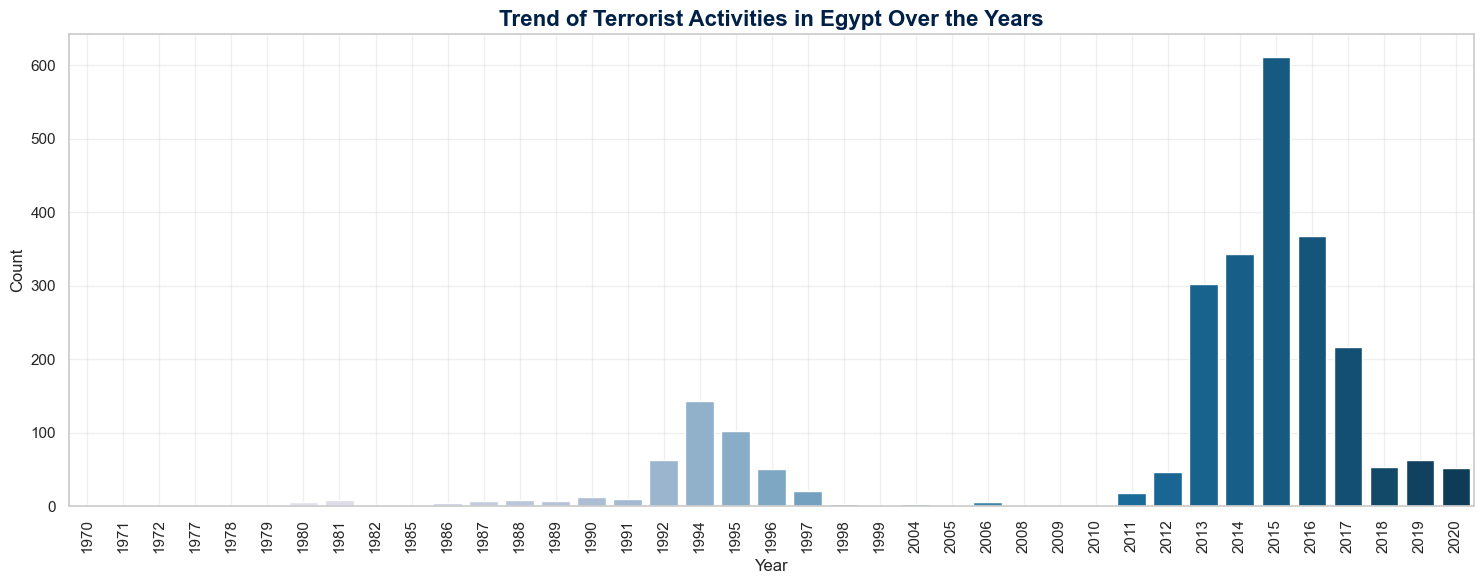

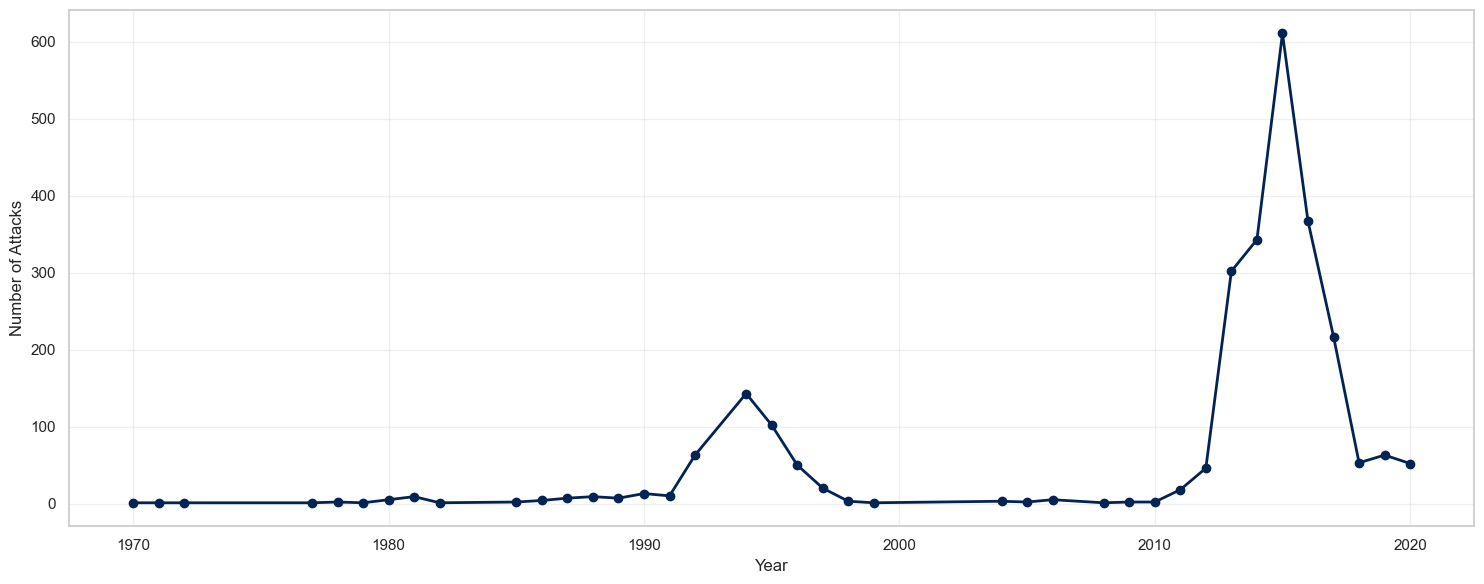

In [9]:
# --- Bar Chart ---
plt.figure(figsize=(15, 6))
year_order = sorted(data['year'].unique())
sns.countplot(x='year', data=data, palette='PuBu', order=year_order)
plt.xticks(rotation=90)
plt.title('Trend of Terrorist Activities in Egypt Over the Years', fontsize=16, weight='bold', color='#002147')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- Line Chart ---
plt.figure(figsize=(15, 6))
yearly_attacks = data['year'].value_counts().sort_index()
plt.plot(yearly_attacks.index, yearly_attacks.values, color="#032355", marker='o', linewidth=2)

# Styling

plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [10]:
data.columns

Index(['year', 'month', 'day', 'extended_event', 'country', 'region',
       'province_state', 'city', 'vicinity_area', 'criteria_political',
       'criteria_economic', 'criteria_religious', 'multiple_attacks',
       'successful_attack', 'suicide_attack', 'primary_attack_type',
       'primary_target_type', 'primary_target_subtype', 'target_nationality',
       'secondary_target_type', 'group_name', 'individual_attack',
       'attack_claimed', 'claim_mode', 'primary_weapon_type',
       'secondary_weapon_type', 'secondary_weapon_subtype', 'num_killed',
       'num_killed_us', 'num_killed_terrorists', 'num_wounded',
       'num_wounded_us', 'num_wounded_terrorists', 'property_damage',
       'property_extent_code', 'property_extent', 'property_value',
       'hostage_incident', 'ransom_demanded', 'hostage_outcome_code',
       'hostage_outcome', 'num_released', 'month_name'],
      dtype='object')

## Accidents by Province

In [11]:
data['province_state'].value_counts().head(20)

province_state
North Sinai    1368
Cairo           242
Minya           188
Giza            118
Asyut           114
Al Sharqia       57
Alexandria       56
Faiyum           55
Gharbia          30
Beni Suef        29
Qena             29
Qalyubia         28
South Sinai      26
Ismailia         22
Unknown          21
Suez             17
Beheira          16
Damietta         14
Port Said        14
Aswan            13
Name: count, dtype: int64

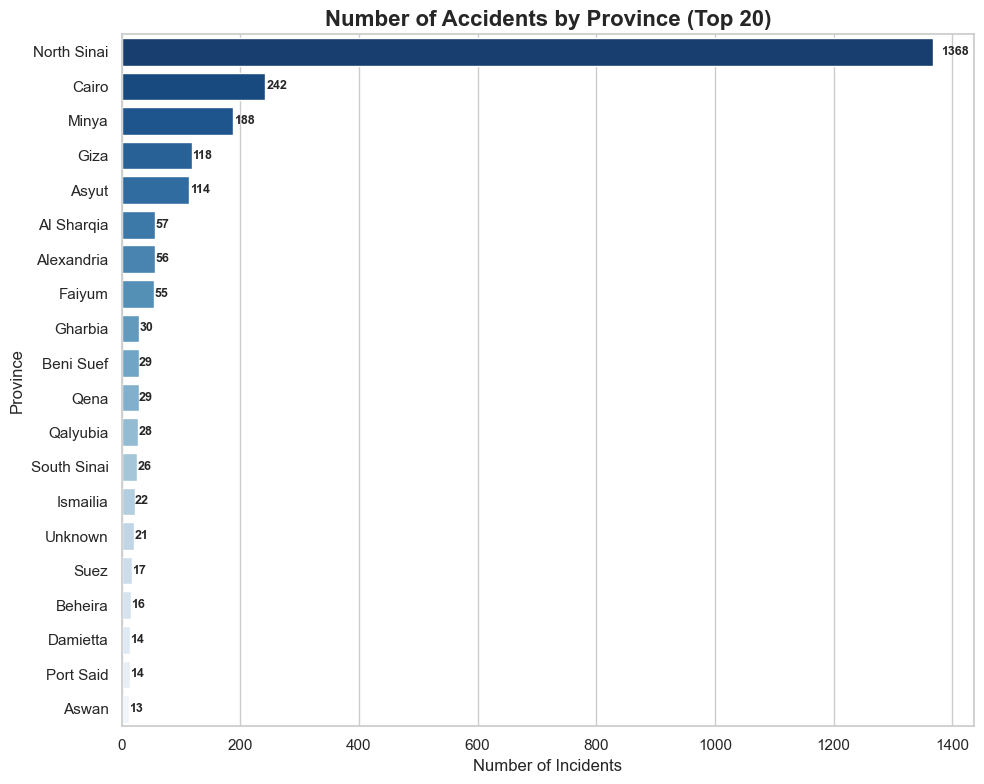

In [12]:
plt.figure(figsize=(10, 8))

province_counts = data['province_state'].value_counts().head(20)

sns.barplot(
    y=province_counts.index,
    x=province_counts.values,
    palette='Blues_r'
)
plt.title('Number of Accidents by Province (Top 20)', fontsize=16, weight='bold')
plt.xlabel('Number of Incidents', fontsize=12)
plt.ylabel('Province', fontsize=12)

for i, v in enumerate(province_counts.values):
    plt.text(v + (v * 0.01), i, str(v), va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

## Accidents by City

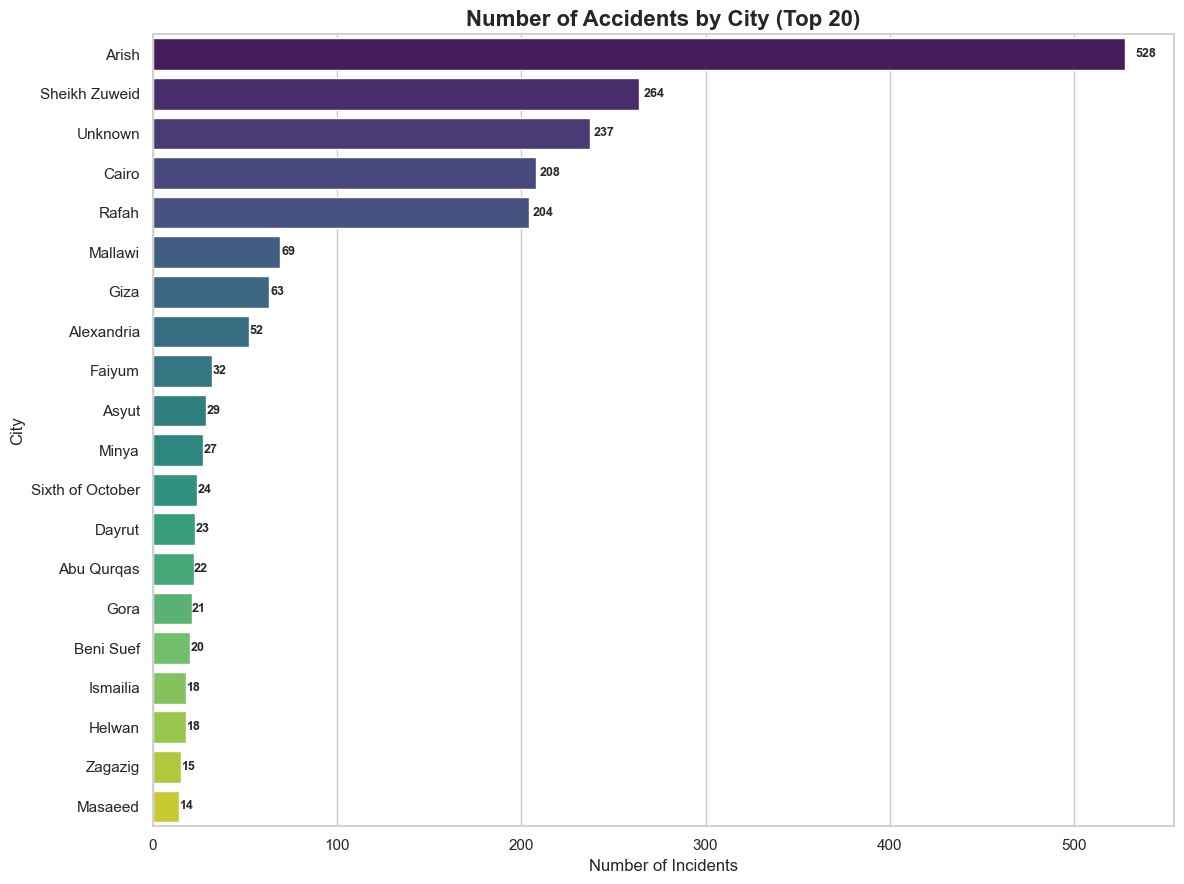

In [13]:
plt.figure(figsize=(12, 9))

province_counts = data['city'].value_counts().head(20)

sns.barplot(
    y=province_counts.index,
    x=province_counts.values,
    palette='viridis'
)
plt.title('Number of Accidents by City (Top 20)', fontsize=16, weight='bold')
plt.xlabel('Number of Incidents', fontsize=12)
plt.ylabel('City', fontsize=12)

for i, v in enumerate(province_counts.values):
    plt.text(v + (v * 0.01), i, str(v), va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

In [20]:
data.columns

Index(['year', 'month', 'day', 'extended_event', 'country', 'region',
       'province_state', 'city', 'vicinity_area', 'criteria_political',
       'criteria_economic', 'criteria_religious', 'multiple_attacks',
       'successful_attack', 'suicide_attack', 'primary_attack_type',
       'primary_target_type', 'primary_target_subtype', 'target_nationality',
       'secondary_target_type', 'group_name', 'individual_attack',
       'attack_claimed', 'claim_mode', 'primary_weapon_type',
       'secondary_weapon_type', 'secondary_weapon_subtype', 'num_killed',
       'num_killed_us', 'num_killed_terrorists', 'num_wounded',
       'num_wounded_us', 'num_wounded_terrorists', 'property_damage',
       'property_extent_code', 'property_extent', 'property_value',
       'hostage_incident', 'ransom_demanded', 'hostage_outcome_code',
       'hostage_outcome', 'num_released', 'month_name'],
      dtype='object')

## Terrorist Activities by Province Over Time

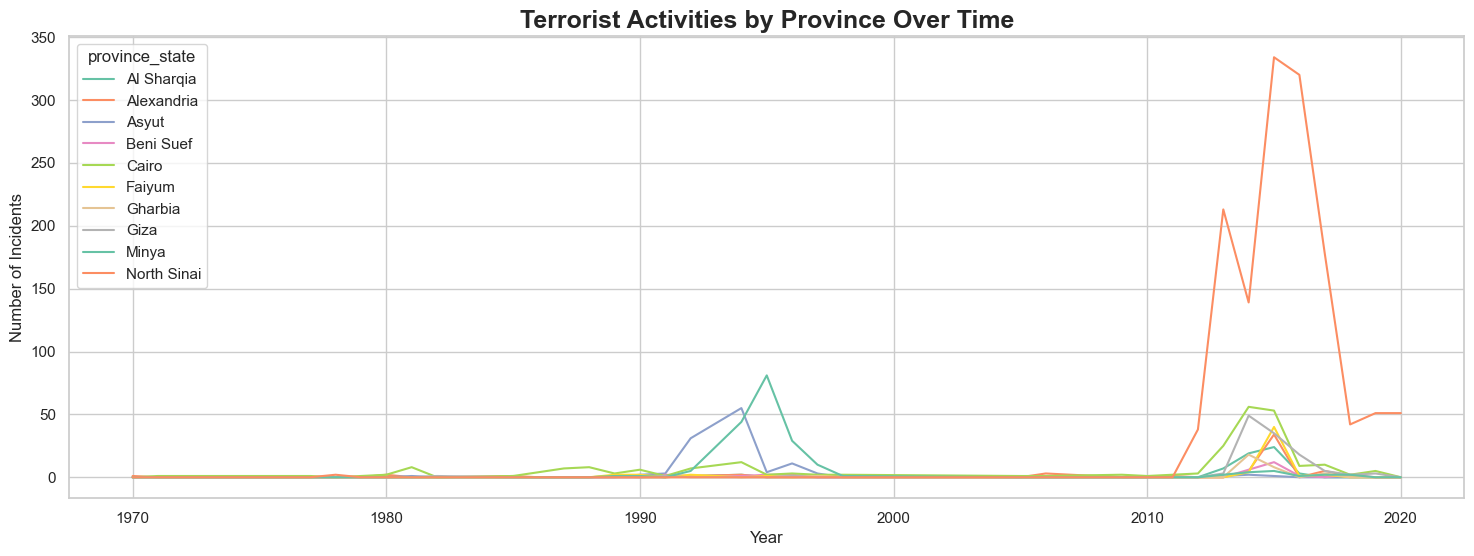

In [14]:
top_10 = data['province_state'].value_counts().head(10).index

# Filter data for only top 10 regions
filtered_data = data[data['province_state'].isin(top_10)]

# Create crosstab: counts per year for each top region
province_state = pd.crosstab(filtered_data['year'], filtered_data['province_state'])

# Plot with 10 distinct colors
province_state.plot(color=sns.color_palette('Set2',12))
fig = plt.gcf()
plt.title('Terrorist Activities by Province Over Time', fontsize=18, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
fig.set_size_inches(18, 6)
plt.show()

## Vicinity Area Distribution

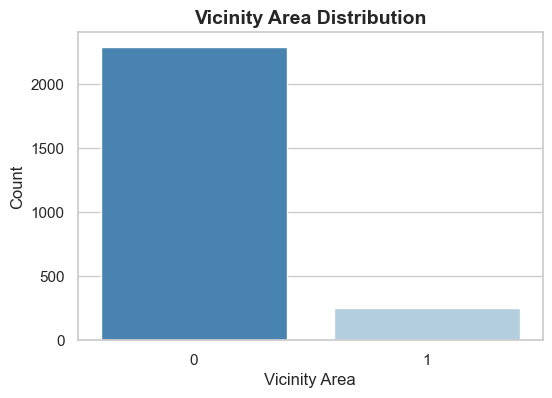

In [15]:
# Replace -9 with mode value
mode_value = data['vicinity_area'].mode()[0]
data['vicinity_area'].replace(-9, mode_value, inplace=True)

# Plot the counts
plt.figure(figsize=(6, 4))
sns.countplot(x='vicinity_area', data=data, palette='Blues_r')
plt.title('Vicinity Area Distribution', fontsize=14, weight='bold')
plt.xlabel('Vicinity Area')
plt.ylabel('Count')
plt.show()

## Distribution of Multiple Attacks

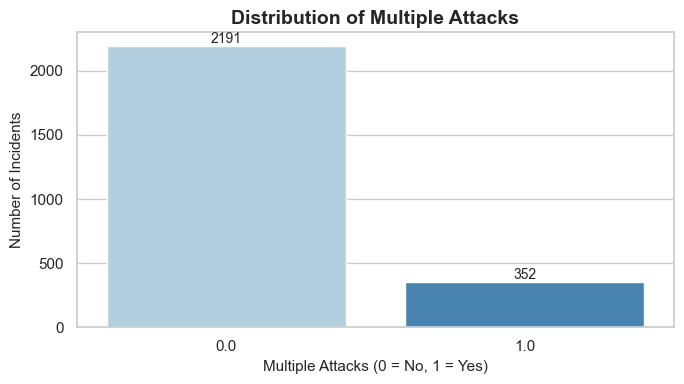

In [17]:
plt.figure(figsize=(7, 4))
sns.set_style("whitegrid")

sns.countplot(data=data, x='multiple_attacks', palette='Blues')

plt.title('Distribution of Multiple Attacks', fontsize=14, weight='bold')
plt.xlabel('Multiple Attacks (0 = No, 1 = Yes)', fontsize=11)
plt.ylabel('Number of Incidents', fontsize=11)

ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

## Distribution of Successful Attacks

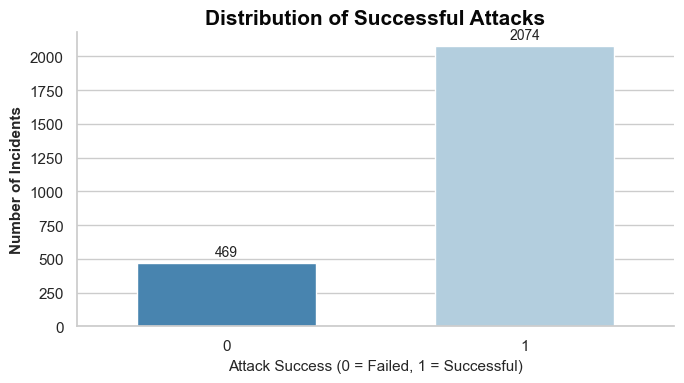

In [18]:
plt.figure(figsize=(7, 4))
sns.set_style("whitegrid")

ax = sns.countplot(
    data=data,
    x='successful_attack',
    palette='Blues_r',
    width=0.6
)

plt.title('Distribution of Successful Attacks', fontsize=15, weight='bold', color="#070707")
plt.xlabel('Attack Success (0 = Failed, 1 = Successful)', fontsize=11)
plt.ylabel('Number of Incidents', fontsize=11, weight='bold')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3, color='#222222')

# Aesthetic adjustments
sns.despine()
plt.tight_layout()
plt.show()

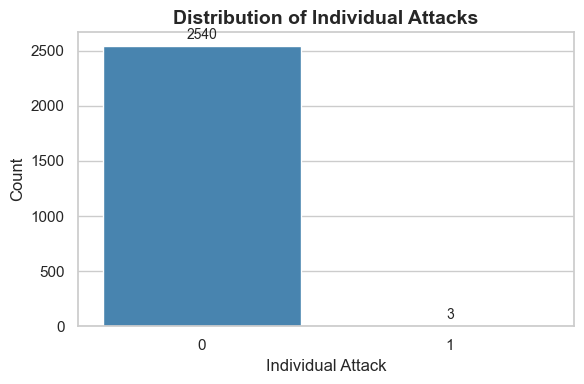

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(
    data=data, 
    x='individual_attack', 
    palette='Blues_r'  
)

plt.title('Distribution of Individual Attacks', fontsize=14, weight='bold')
plt.xlabel('Individual Attack', fontsize=12)
plt.ylabel('Count', fontsize=12)

for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

## Criteria Comparison

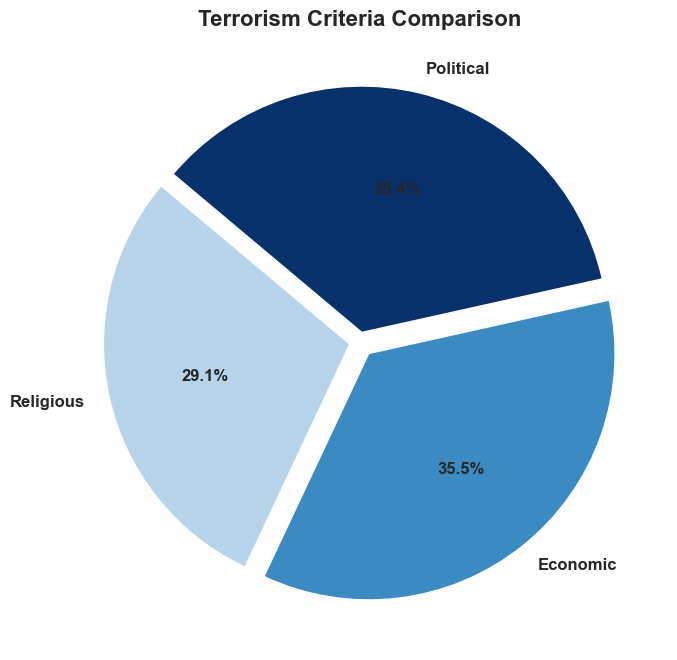

In [16]:
criteria = pd.Series({
    'Religious': sum(data.criteria_religious),
    'Economic': sum(data.criteria_economic),
    'Political': sum(data.criteria_political)
})

labels = criteria.index 
sizes = criteria.values   
explode = [0.04 if v != max(sizes) else 0.06 for v in sizes]

plt.figure(figsize=(12, 8))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    explode = explode,
    textprops={'fontsize': 12, 'weight': 'bold'},
    colors=plt.cm.Blues(np.linspace(0.3, 1, len(labels)))
)
plt.title('Terrorism Criteria Comparison', fontsize=16, weight='bold')
plt.show()

## Terrorist Groups Attacks

In [20]:
data['group_name'].value_counts()

group_name
Unknown                                             1307
Sinai Province of the Islamic State                  537
Al-Gama'at al-Islamiyya (IG)                         253
Muslim extremists                                    101
Ansar Bayt al-Maqdis (Ansar Jerusalem)                64
Muslim Militants                                      48
Muslim Brotherhood                                    36
Ajnad Misr                                            31
Islamic State in Egypt                                24
Muslim Fundamentalists                                22
Hasam Movement                                        21
Popular Resistance Movement (Egypt)                   12
Islamist extremists                                   11
Bedouin tribesmen                                     10
Revolutionary Punishment Movement                     10
Egyptian Islamic Jihad (Al-Jihad)                      9
Abdullah Azzam Brigades                                4
Egypt's Revolution  

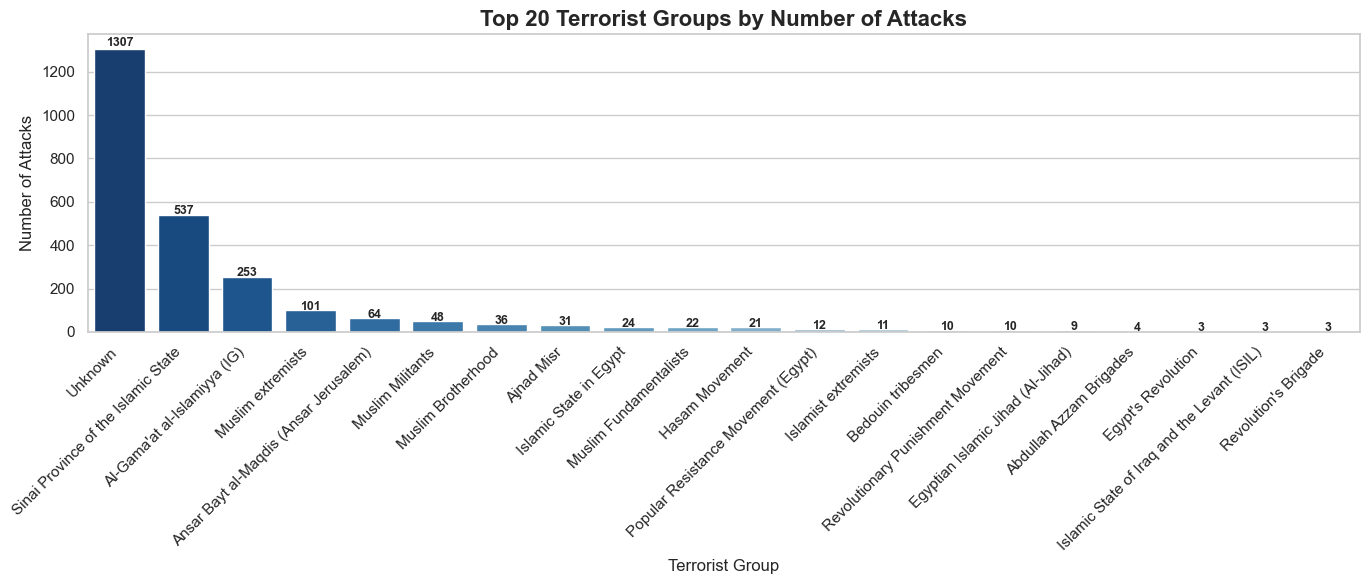

In [42]:
# Get top 20 groups (excluding Unknown)
top_20_g = data['group_name'].value_counts().head(20)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(x=top_20_g.index, y=top_20_g.values, palette='Blues_r')

plt.title('Top 20 Terrorist Groups by Number of Attacks', fontsize=16, weight='bold')
plt.xlabel('Terrorist Group', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels
for i, v in enumerate(top_20_g.values):
    plt.text(i, v + (v * 0.01), str(v), ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

## Terrorist Groups Killings

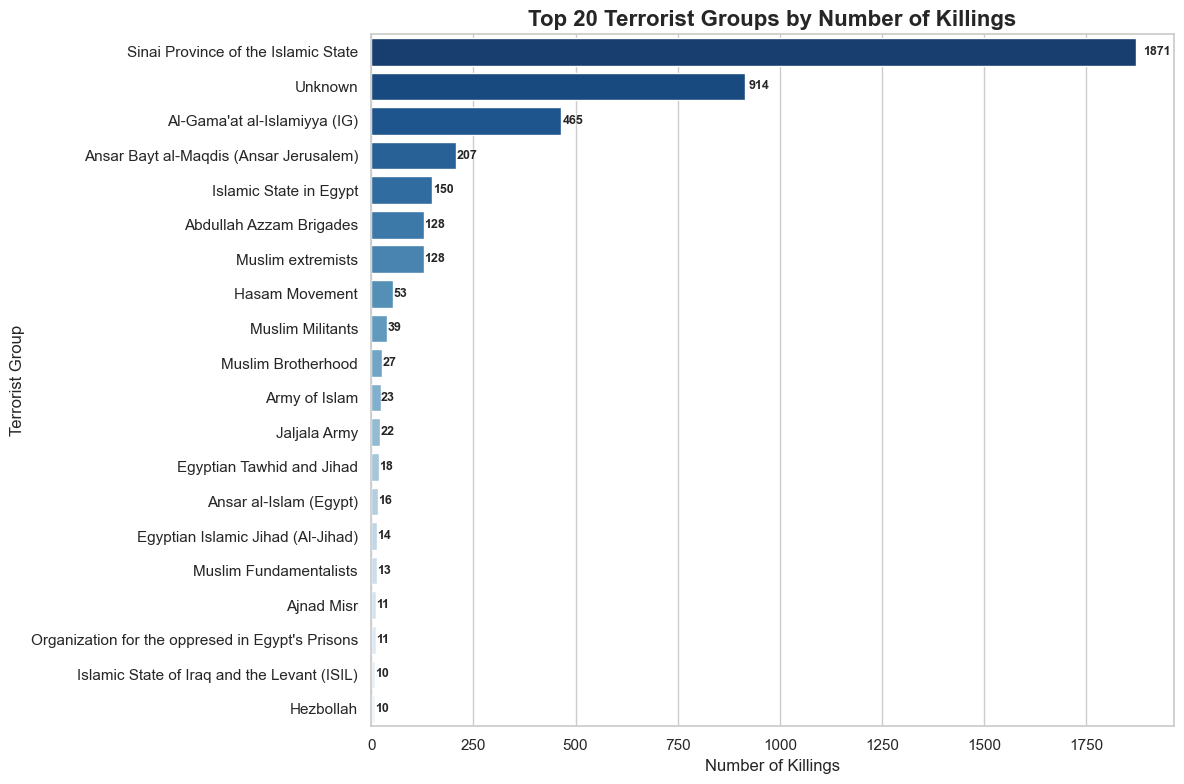

In [45]:
# Sum the number of killed per group (including 'Unknown')
group_kills = data.groupby('group_name')['num_killed'].sum()

# Get top 20 groups
top_20_g = group_kills.sort_values(ascending=False).head(20)

# Plot horizontal bar chart (cleaner for long names)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_g.values, y=top_20_g.index, palette='Blues_r')

plt.title('Top 20 Terrorist Groups by Number of Killings', fontsize=16, weight='bold')
plt.xlabel('Number of Killings', fontsize=12)
plt.ylabel('Terrorist Group', fontsize=12)

# Add value labels
for i, v in enumerate(top_20_g.values):
    plt.text(v + (v*0.01), i, str(int(v)), va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

## Attacking Methods

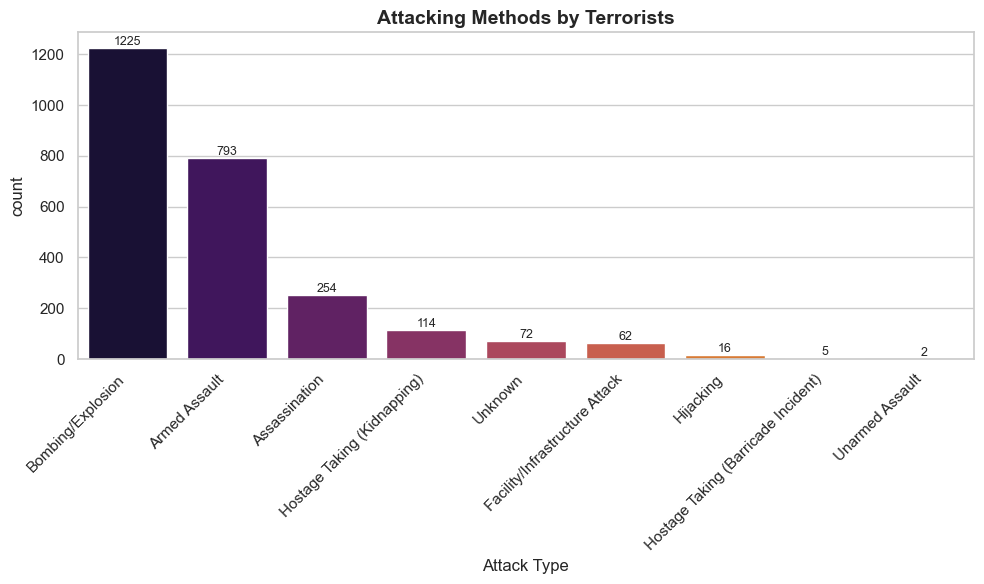

In [23]:
plt.figure(figsize=(10, 6))
attack_order = data['primary_attack_type'].value_counts().index
ax = sns.countplot(
    data=data,
    x='primary_attack_type',
    order=attack_order,
    palette='inferno'
)
plt.xticks(rotation=45, ha='right')
plt.title('Attacking Methods by Terrorists', fontsize=14, weight='bold')
plt.xlabel('Attack Type')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)
    
plt.tight_layout()
plt.show()

## Primary Target Types

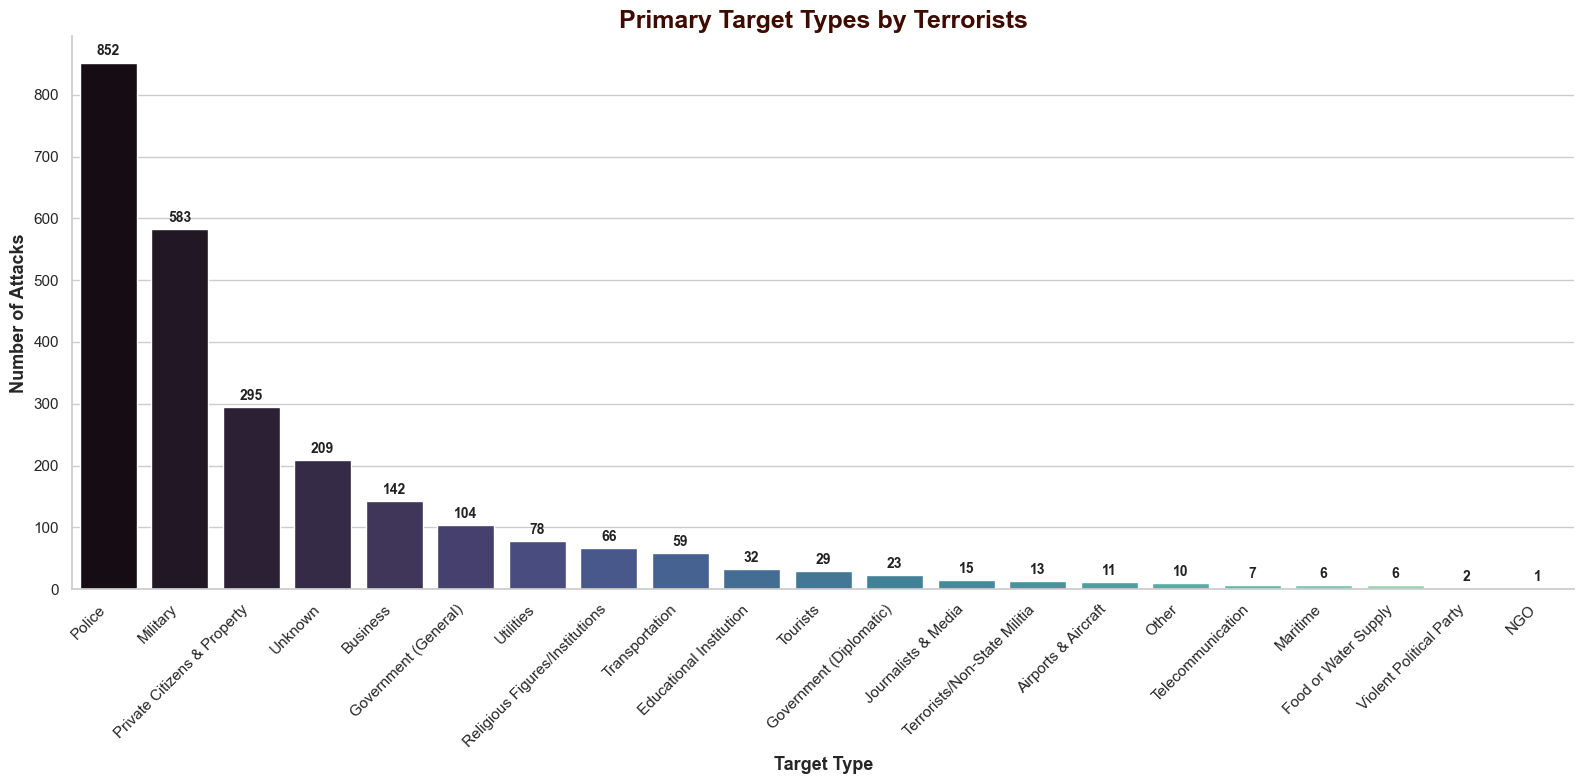

In [24]:
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")

# Sort by count for consistent order
attack_order = data['primary_target_type'].value_counts().index

# Create the plot
ax = sns.countplot(
    data=data,
    x='primary_target_type',
    order=attack_order,
    palette='mako'
)

# Titles and labels
plt.title('Primary Target Types by Terrorists', fontsize=18, weight='bold', color='#3E0B00')
plt.xlabel('Target Type', fontsize=13, weight='bold')
plt.ylabel('Number of Attacks', fontsize=13, weight='bold')

# Rotate x labels for readability
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

# Add value labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3, weight='bold', color='#222222')

# Adjust spacing and remove top/right borders
sns.despine()
plt.tight_layout()
plt.show()


## Target Nationality

In [38]:
nationality = data['target_nationality'].value_counts().head(10)

# Convert to DataFrame with proper column names
nationality_df = nationality.reset_index()
nationality_df.columns = ['Target Nationality', 'Count']

nationality_df

,Target Nationality,Count
0,Egypt,2472
1,United States,11
2,Israel,11
3,International,9
4,Great Britain,4
5,Germany,3
6,Multinational,3
7,West Bank and Gaza Strip,3
8,Libya,2
9,Russia,2


## **Overall Terrorism KPIs Summary**

### Basic Overview

In [55]:
total_attacks = len(data)
total_groups = data['group_name'].nunique()

print('Total Number of Attacks', total_attacks)
print('Total Terrorist Groups', total_groups)

Total Number of Attacks 2543
Total Terrorist Groups 50


### Casualty Metrics

In [53]:
total_killed = data['num_killed'].sum()
total_wounded = data['num_wounded'].sum()
avg_killed_per_attack = round(data['num_killed'].mean(), 2)
avg_wounded_per_attack = round(data['num_wounded'].mean(), 2)
most_lethal_group = data[data['group_name'] != 'Unknown'].groupby('group_name')['num_killed'].sum().idxmax()

print('Total Killed', total_killed)
print('Total Wounded', total_wounded)
print('Average Killed per Attack', avg_killed_per_attack)
print('Average Wounded per Attack', avg_wounded_per_attack)
print('Most Lethal Group', most_lethal_group)

Total Killed 4187.0
Total Wounded 5163.0
Average Killed per Attack 1.65
Average Wounded per Attack 2.03
Most Lethal Group Sinai Province of the Islamic State


### Attack Statistics and Impact Overview

In [54]:
attacks_by_year = data.groupby('year').size()
deadliest_year = attacks_by_year.idxmax()
attacks_by_region = data['region'].value_counts()
attacks_by_attack_type = data['primary_attack_type'].value_counts()
successful_ratio = (data['successful_attack'].mean()) * 100
suicide_ratio = (data['suicide_attack'].mean()) * 100
individual_ratio = (data['individual_attack'].mean()) * 100
hostage_cases = data['hostage_incident'].sum()
avg_ransom_demanded = data['ransom_demanded'].mean() * 100
property_damage_ratio = data['property_damage'].mean() * 100
avg_property_value = data['property_value'].replace(0, np.nan).mean()

print('Deadliest Year', deadliest_year)
print('Success Rate (%)', round(successful_ratio, 2))
print('Suicide Attack Rate (%)', round(suicide_ratio, 2))
print('Individual Attack Rate (%)', round(individual_ratio, 2))
print('Hostage Cases', int(hostage_cases))
print('Ransom Demanded (%)', round(avg_ransom_demanded, 2))
print('Property Damage (%)', round(property_damage_ratio, 2))
print('Average Property Loss (USD)', round(avg_property_value, 2))

Deadliest Year 2015
Success Rate (%) 81.56
Suicide Attack Rate (%) 3.11
Individual Attack Rate (%) 0.12
Hostage Cases 102
Ransom Demanded (%) 0.16
Property Damage (%) 48.84
Average Property Loss (USD) 2956.25


----

# **Thanks You**